<p align="center">
<img src="https://drive.google.com/uc?id=1jmz6Gi3utzm768-wBWX6l0IWSZny-1u1" width="600">
</p>


<h1>EVO: cvičení 1 - Úloha N dam, TSP</h1>

___

#<h2>Řešená úloha - Problém N dam</h2>

Jak lze rozmístit *n* dam na šachovnici o rozměrech *n×n* tak, aby se vzájemně neohrožovaly?

<p align="center">
<img src="https://drive.google.com/uc?id=1iaWBddbBDJN7uFh9404XcxBv2SoKK_0C" width="200">
</p>


* Chceme ušetřit počet kombinací stavového prostoru
* Víme, že dámy nemohou být ve stejném sloupci ani řádku
  * O(*n<sup>2n</sup>*) = (8<sup>2*8</sup>) =   281 474 976 710 656<br><sub>(tzn. 281 bilionů -- pro představu: int32_max = 2,1 mld.; veřejný dluh ČR je 2,7 bil.)</sub>
  * O(*n*!) = 8! =   40 320 
* **→ permutační kódování**
* Permutační kódování vyžaduje vhodné genetické operátory. 
___

1. Doplňte fitness funkci:
  * Fitness by měla být tím menší, čím lepší je řešení problému.
  * → Počet konfliktů.
  * Máme už hotové kódování, které zajišťuje absenci konfliktů na řádcích a sloupcích.
  * → Potřebujeme spočítat počet konfliktů na diagonálách. 
2. Program vypisuje průběžné údaje (číslo iterace, fitness).<br>Po doběhnutí vykreslí na šachovnici s nalezeným řešením.
3. **Až budete mít fungující program, zobrazte průběh několika běhů.**
4. Experimentujte s nastavením parametrů, hledejte co nejlepší.

Import použitých knihoven

In [7]:
import sys
from random import shuffle, randint, random
from math import sqrt, exp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request

!gdown 1M9iz9I6vT0hT9ef4pWQ15GUxQAuWjbvn

zsh:1: command not found: gdown


Tisk výsledné šachovnice

In [2]:
def printQueens (qs):
	print("   \u2554", end="") #╔
	for d in range(len(qs)*3):
		print("\u2550", end="") #═
	print("\u2557\n", end="") #╗

	for row in range(len(qs)):
		print("   \u2551", end="") #║
		for col in range(len(qs)):
			if (row&1^col&1):
				if (col==qs[row]):
					print("\u2591\u25CF\u2591", end="") #░●░ #sachova dama je ♕\u2655 nebo ♛\u265B
				else:
					print("\u2591\u2591\u2591", end="") #░░░
			else:
				if (col==qs[row]):
					print(" \u25CF ", end="") #●
				else:
					print("   ", end="")
		print("\u2551\n", end="") #║

	print("   \u255A", end="") #╚
	for d in range(len(qs)*3):
		print("\u2550", end="") #═
	print("\u255D\n", end="") #╝

Smyčka hledání řešení pomocí Metropolisova algoritmu

In [3]:
def metropolis (q, max, param):
	fitness_history = []
	s = len(q)-1

	prevq = q[:]
	prevfit = fitness(q)
	
	for i in range(max):
		a = randint(0, s)
		b = randint(0, s)
		newq = prevq[:]
		newq[a] = prevq[b]
		newq[b] = prevq[a]

		newfit = fitness(newq)

		is_accepted = exp((prevfit-newfit)/param) > random()

		if is_accepted:
			prevq = newq[:]
			prevfit = newfit
			fitness_history.append((i, newfit))
			print("Iterace: " + str(i) + ", fitness: " + str(newfit))

		if newfit == 0:
			return prevq[:], fitness_history

	print("")
	return prevq[:], fitness_history

Výpočet fitness (počet konfliktů)

In [4]:
def fitness (qs):
	confs = 0

	for row in range(len(qs)):
		diff = 0
		for enemy in range(row+1, len(qs)):
			diff += 1
			if abs(qs[row] - qs[enemy]) == diff:
				confs += 1
	return confs

Hlavní smyčka programu

Iterace: 2, fitness: 18
Iterace: 3, fitness: 17
Iterace: 6, fitness: 13
Iterace: 8, fitness: 12
Iterace: 9, fitness: 12
Iterace: 11, fitness: 12
Iterace: 13, fitness: 11
Iterace: 19, fitness: 11
Iterace: 22, fitness: 10
Iterace: 25, fitness: 9
Iterace: 30, fitness: 9
Iterace: 35, fitness: 9
Iterace: 36, fitness: 9
Iterace: 38, fitness: 9
Iterace: 41, fitness: 8
Iterace: 48, fitness: 8
Iterace: 49, fitness: 8
Iterace: 51, fitness: 8
Iterace: 56, fitness: 8
Iterace: 57, fitness: 8
Iterace: 60, fitness: 8
Iterace: 65, fitness: 7
Iterace: 66, fitness: 7
Iterace: 67, fitness: 7
Iterace: 70, fitness: 6
Iterace: 80, fitness: 5
Iterace: 83, fitness: 5
Iterace: 86, fitness: 5
Iterace: 102, fitness: 4
Iterace: 104, fitness: 4
Iterace: 126, fitness: 4
Iterace: 137, fitness: 4
Iterace: 138, fitness: 4
Iterace: 143, fitness: 4
Iterace: 145, fitness: 3
Iterace: 161, fitness: 3
Iterace: 164, fitness: 3
Iterace: 174, fitness: 3
Iterace: 179, fitness: 3
Iterace: 190, fitness: 3
Iterace: 201, fitness: 3

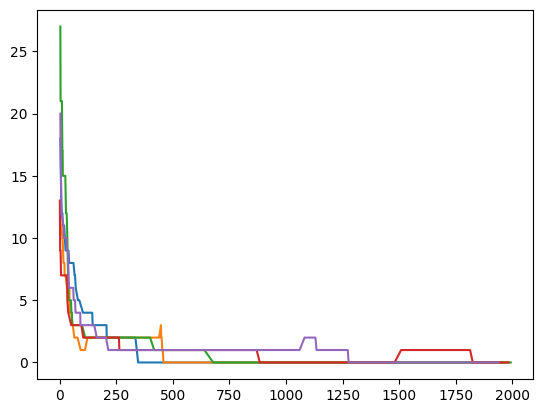

In [27]:
REPEATS = 5  # Pocet behu programu
SIZE = 25  # Velikost hrany sachovnice
MAX_ITER = 2000  # Maximalni pocet iteraci
PARAM = 0.15  # Pravdepodobnost prijeti horsiho reseni

fitness_history = []

for r in range(0, REPEATS):
  q = list(range(SIZE))

  shuffle(q)

  q, fit_h = metropolis(q, MAX_ITER, PARAM)

  fitness_history.append(fit_h)

  print ("Nalezene reseni, fitness =", fitness(q))
  print ("Genotyp")
  print (q)
  print ("Fenotyp")
  printQueens(q)
  print ("-------------------------------------")

# Vykresleni prubehu behu
for i in range(len(fitness_history)):
  plt.plot(*zip(*fitness_history[i]))

plt.show()

___
___
#<h2>Řešená úloha - Problém obchodního cestujícího (TSP)<h2>

V daném ohodnoceném úplném grafu najděte nejkratší hamiltonovskou kružnici.

Př.: vrtání desek plošných spojů -- co nejkratší dráha vrtáku:

<div align="center">
<img src="https://drive.google.com/uc?id=14oi594K7YcsicHh21zIQvrgMf5RTeT1X" width="200">

<sub>(obvod http://pandatron.cz/?199&ne555_-_priklady_pouziti_-_1)</sub>
</div>

___


1. Program vypisuje průběžné údaje (číslo iterace, vzdálenost, nejlepší vzdálenost) a po doběhnutí graficky znázorní nejlepší nalezené dráhy vrtáku.
2. Ověřte, že algoritmus nachází „dobré“ řešení.
3. Jaký typ algoritmu je použit?
4. **Zobrazte průběh několika běhů.**
5. Vysvětlete rozdíl mezi jednotlivými variantami algoritmu. 

Definice souřadnic bodů

In [2]:
drillPos = {'A':(610,144),
            'B':(729,159),
            'C':(489,189),
            'D':(369,189),
            'E':(264,189),
            'F':(264,309),
            'G':(332,329),
            'H':(332,509),
            'I':(393,329),
            'J':(393,509),
            'K':(452,329),
            'L':(452,509),
            'M':(512,329),
            'N':(512,509),
            'O':(610,324),
            'P':(640,416),
            'Q':(640,594),
            'R':(445,594),
            'S':(325,594),
            'T':(445,744),
            'U':(325,744),
            'V':(729,714),
            'W':(145,714),
            'X':(145,354),
            'Y':(210,432),
            'Z':(270,432),
            'AA':(235,534),
            'AB':(235,714)
            }

Výpočet vzdálenosti mezi místy vrtání

In [3]:
def calcCoordsDistances(coordDict):

    coords = list(coordDict.keys())
    n = len(coords)
    distances = {}

    for i in range(n - 1):
        pointA = coords[i]
        latA, longA = coordDict[pointA]

        for j in range(i + 1, n):
            pointB = coords[j]
            latB, longB = coordDict[pointB]
            dist = sqrt((latA-latB)**2 + (longA-longB)**2)
            key = frozenset((pointA, pointB))
            distances[key] = dist

    return  distances

Výpočet délky trasy mezi dvěmi body

In [4]:
def getRouteLength(distanceData, route):

    distance = 0.0

    for i, pointA in enumerate(route[:-1]):
        pointB = route[i+1]
        key = frozenset((pointA,  pointB))
        distance += distanceData[key]

    return distance

Algoritmus hledání nejkratší trasy

In [18]:
def travellingSalesman(distanceData, coords, numSteps=10000):

    results_gen = []
    results_fit = []
    results_best_fit = []

    n = len(coords)
    bestRoute = coords[:]
    shuffle(bestRoute)

    dists = list(distanceData.values())
    scale = 75.5 #0.5 * array(dists).std()

    bestDistance = getRouteLength(distanceData, bestRoute)
    prevRoute = bestRoute
    prevDistance = bestDistance

    allRoutes = [bestRoute]

    for i in range(numSteps):
        cool = exp(-i/float(numSteps)) # annealing schedule 'temperature'
        a = randint(0, n-1)
        b = randint(0, n-1)
        route = prevRoute[:]
        route[a] = prevRoute[b]
        route[b] = prevRoute[a]

        distance = getRouteLength(distanceData, route)

        ## 1. varianta
        #is_accepted = distance < prevDistance

        ## 2. varianta
        #is_accepted = exp((prevDistance-distance)/scale) > random()

        ## 3. varianta
        is_accepted = exp((prevDistance-distance)/(scale*cool)) > random()

        if is_accepted:
            prevRoute = route
            prevDistance = distance
            results_gen.append(i)
            results_fit.append(distance)
            results_best_fit.append(bestDistance)
            #print('{:8d}'.format(i) + " " + '{:0.5f}'.format(distance) + " " + '{:0.5f}'.format(bestDistance), file=sys.stderr)

        if distance < bestDistance:
            bestRoute = route[:]
            bestDistance = distance
            allRoutes.append(bestRoute)

    print("", file=sys.stderr)
    return bestDistance, bestRoute, allRoutes, results_gen, results_fit, results_best_fit

Hlavní smyčka programu

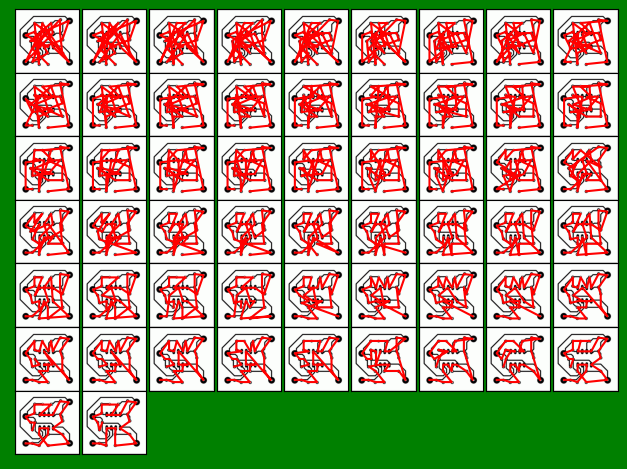

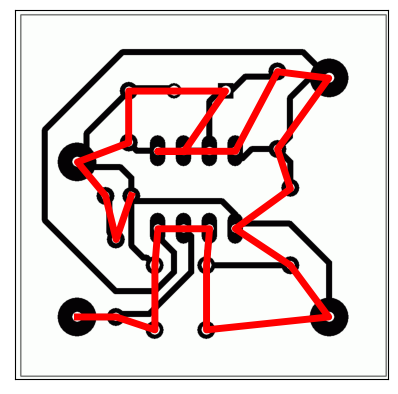

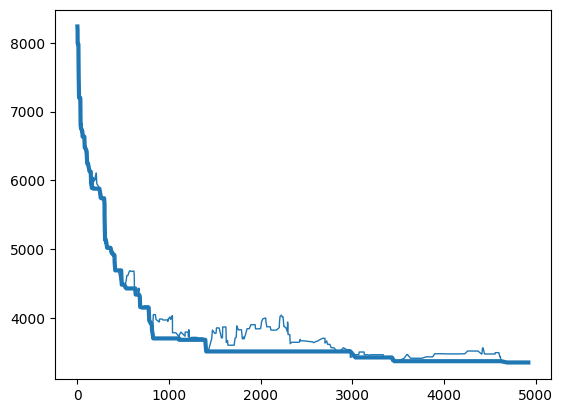

In [23]:
REPEATS = 1  # Pocet behu programu

## inicializace
distances = calcCoordsDistances(drillPos)
coords = list(drillPos.keys())
results_gen_t = []
results_fit_t = []
results_best_fit_t = []

for r in range(0, REPEATS):

  ## evoluce
  bestDistance, bestRoute, allRoutes, results_gen, results_fit, results_best_fit = travellingSalesman(distances, coords, 5000)

  results_gen_t.append(results_gen)
  results_fit_t.append(results_fit)
  results_best_fit_t.append(results_best_fit)

  # mame spocitano, jdeme kreslit
  n = len(allRoutes)
  cols = int(sqrt(n)*4/3)
  rows = int(n/cols+1)
  plt.figure(facecolor='g', edgecolor='k')

  #url = "https://drive.google.com/uc?id=1M9iz9I6vT0hT9ef4pWQ15GUxQAuWjbvn"
  #image = mpimg.imread(urllib.request.urlopen(url), 0)
  image = mpimg.imread('ne555.gif', 0)

  i = 1
  for route in allRoutes:
      Xs = []
      Ys = []
      for city in route:
          Xs.append(drillPos[city][0])
          Ys.append(drillPos[city][1])
      #print((Xs,Ys))
      ax = plt.subplot(rows,cols,i)
      plt.xticks([])
      plt.yticks([])
      ax.imshow(image)
      ax.plot(Xs,Ys, 'r-')
      i += 1

  plt.tight_layout()
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.show()

  # znovu posledni obrazek, ale ve velkem
  plt.figure(2)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image)
  plt.plot(Xs,Ys, 'r-', lw=5)
  plt.show()

# Vykresleni prubehu behu
for i in range(0, REPEATS):
  line, = plt.plot(results_gen_t[i], results_fit_t[i], linewidth=1)
  plt.plot(results_gen_t[i], results_best_fit_t[i], linewidth=3, color=line.get_color())

plt.show()

Autoři:<br>
Ing. Michal Bidlo Ph.D.,<br>
Ing. Martin Hurta,<br>
Ing. Martin Hyrš Ph.D.